# Multilayer Perceptron

In [2]:
# univariate mlp example
from numpy import array
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# define dataset
X = array([[10, 20, 30], [20, 30, 40], [30, 40, 50], [40, 50, 60]])
y = array([40, 50, 60, 70])

# define model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=3))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=2000, verbose=0)

# demonstrate prediction
x_input = array([50, 60, 70])
x_input = x_input.reshape((1, 3))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[81.93293]]


In [3]:
X

array([[10, 20, 30],
       [20, 30, 40],
       [30, 40, 50],
       [40, 50, 60]])

In [4]:
y

array([40, 50, 60, 70])

# Time Series Prediction With Deep Learning in Keras

## Multilayer Perceptron Regression

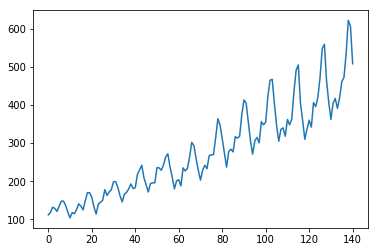

In [5]:
import pandas
import matplotlib.pyplot as plt

dataset = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
plt.plot(dataset);

In [6]:
# Multilayer Perceptron to Predict International Airline Passengers (t+1, given t)

import numpy
import matplotlib.pyplot as plt
import pandas
import math
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

dataframe.head()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121


In [8]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

94 47


In [9]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [10]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
 - 0s - loss: 21582.5972
Epoch 2/200
 - 0s - loss: 14950.5038
Epoch 3/200
 - 0s - loss: 9791.5057
Epoch 4/200
 - 0s - loss: 6139.0401
Epoch 5/200
 - 0s - loss: 3570.6780
Epoch 6/200
 - 0s - loss: 2059.1486
Epoch 7/200
 - 0s - loss: 1200.8857
Epoch 8/200
 - 0s - loss: 789.9237
Epoch 9/200
 - 0s - loss: 623.1231
Epoch 10/200
 - 0s - loss: 549.4309
Epoch 11/200
 - 0s - loss: 522.3307
Epoch 12/200
 - 0s - loss: 511.9314
Epoch 13/200
 - 0s - loss: 507.2444
Epoch 14/200
 - 0s - loss: 507.6703
Epoch 15/200
 - 0s - loss: 509.2019
Epoch 16/200
 - 0s - loss: 506.8887
Epoch 17/200
 - 0s - loss: 509.6304
Epoch 18/200
 - 0s - loss: 510.5559
Epoch 19/200
 - 0s - loss: 507.6211
Epoch 20/200
 - 0s - loss: 509.6081
Epoch 21/200
 - 0s - loss: 508.5718
Epoch 22/200
 - 0s - loss: 508.4268
Epoch 23/200
 - 0s - loss: 509.7259
Epoch 24/200
 - 0s - loss: 510.2006
Epoch 25/200
 - 0s - loss: 511.0229
Epoch 26/200
 - 0s - loss: 510.6587
Epoch 27/200
 - 0s - loss: 508.5143
Epoch 28/200
 - 0s - loss: 5

In [11]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 503.53 MSE (22.44 RMSE)
Test Score: 2045.97 MSE (45.23 RMSE)


In [12]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [13]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [14]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

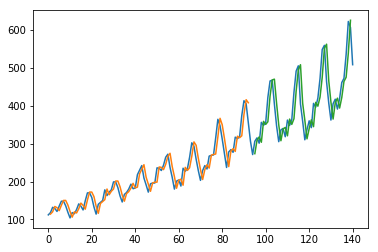

In [15]:
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot);

# Multilayer Perceptron Using the Window Method

In [16]:
# Multilayer Perceptron to Predict International Airline Passengers (t+1, given t, t-1, t-2)

import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [18]:
# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

In [19]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape dataset
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [20]:
# create and fit Multilayer Perceptron model
model = Sequential()

model.add(Dense(12, input_dim=look_back, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(trainX, trainY, epochs=400, batch_size=2, verbose=2)

Epoch 1/400
 - 0s - loss: 1609.9132
Epoch 2/400
 - 0s - loss: 949.1557
Epoch 3/400
 - 0s - loss: 819.4270
Epoch 4/400
 - 0s - loss: 715.8524
Epoch 5/400
 - 0s - loss: 717.0382
Epoch 6/400
 - 0s - loss: 730.0244
Epoch 7/400
 - 0s - loss: 696.7799
Epoch 8/400
 - 0s - loss: 644.8934
Epoch 9/400
 - 0s - loss: 648.3518
Epoch 10/400
 - 0s - loss: 641.8538
Epoch 11/400
 - 0s - loss: 693.0254
Epoch 12/400
 - 0s - loss: 677.7292
Epoch 13/400
 - 0s - loss: 657.2430
Epoch 14/400
 - 0s - loss: 626.6471
Epoch 15/400
 - 0s - loss: 612.4262
Epoch 16/400
 - 0s - loss: 663.1125
Epoch 17/400
 - 0s - loss: 651.1296
Epoch 18/400
 - 0s - loss: 597.9777
Epoch 19/400
 - 0s - loss: 581.7395
Epoch 20/400
 - 0s - loss: 594.0901
Epoch 21/400
 - 0s - loss: 621.0112
Epoch 22/400
 - 0s - loss: 586.5544
Epoch 23/400
 - 0s - loss: 593.3263
Epoch 24/400
 - 0s - loss: 568.5984
Epoch 25/400
 - 0s - loss: 564.2904
Epoch 26/400
 - 0s - loss: 575.4710
Epoch 27/400
 - 0s - loss: 609.6438
Epoch 28/400
 - 0s - loss: 591.5572


In [21]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 405.02 MSE (20.13 RMSE)
Test Score: 1894.51 MSE (43.53 RMSE)


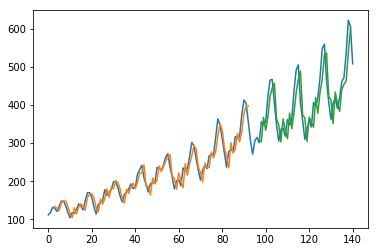

In [23]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot);